<a href="https://colab.research.google.com/github/Idaogah/Data-Science-and-Data-Engineering/blob/main/Bank_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Campaign Analysis**

This document provides an analysis of a bank's marketing campaign dataset, focusing on client engagement and subscription success. The main objective is to uncover insights into how different factors—such as job categories, contact duration, and client demographics—affect the likelihood of a successful subscription. The analysis is conducted using Python, employing libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization.

# 1. Install Packages

In [ ]:
!pip install PyPDF2  # Install PyPDF2 version 2.12.1
!pip install streamlit


# 2. Import Libraries

In [ ]:
# Import PDF reader
import PyPDF2

# Import Analytic and Visualization Lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Google Drive
from google.colab import drive


In [ ]:
# Mount Drive
drive.mount('/content/drive')

# specify file path
file_path = '/content/drive/My Drive/Campaign Analysis/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Instructions

In [ ]:
# Read PDF
pdf_file = 'instruction.pdf'

file = file_path + pdf_file

# Open the PDF file and read its content
with open(file, 'rb') as pdf:
    pdf_reader = PyPDF2.PdfReader(pdf)

    # Extract text from all pages
    instruction = ""
    for page in pdf_reader.pages:
        instruction += page.extract_text()

# Print the extracted text
print(instruction)


Project Brief: Bank Marketing Campaign 
Analysis for Data Analytics Elites  (DAE)  
Greetings from the Data Analytics Elites (DAE). In your role as a newly appointed Data 
Analyst, you will play a crucial role in our endeavors to unravel insights embedded in our 
marketing campaign data. DAE is committed to enhancing customer engagement and 
optimizing marketing strategies through  the strategic application of data -driven analyses. 
Your responsibility is to meticulously analyze our data, uncover trends, comprehend client 
behaviors, and provide valuable insights to inform strategic decision -making processes.  
Objective:  
To analyze and visualize the performance of marketing campaigns and predict client 
subscription to term deposits using Python, providing actionable insights for business 
improvement.  
Task: Marketing Campaign Analysis and Visualization 
using Python  
Data Preparation:  
• Import the dataset into a Python environment using libraries such as pandas.  
• Clean th

# 4. Data Preprocessing

### Preview

In [ ]:

# Read CSV file from drive

csv_file = 'data.csv'
file = file_path + csv_file
df = pd.read_csv(file, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# check the end rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Information

In [ ]:
# verify column types and check for missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Data Cleaning

In [ ]:
# Renaming column with meaningful names
df = df.rename(columns={'y': 'subscription'})

# # Month order
# month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
#                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# # Convert the Month Column to a Categorical Type
# df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# # Sort the data
# df = df.sort_values('month')


# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

print("Number of duplicates = ", duplicates, '\n')
print("Null Count (Missing Values): \n", missing_values, '\n')

# Ensure all columns have correct data type
print('Column types \n', df.dtypes)

# Overall data summary
print('\n Overall data summary')
df.describe()

Number of duplicates =  0 

Null Count (Missing Values): 
 age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64 

Column types 
 age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
subscription    object
dtype: object

 Overall data summary


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
# Save cleaned dataset to drive
df.to_csv('/content/drive/My Drive/Campaign Analysis/cleaned_data.csv', index=False)


# 5. Analysis and Visualization

### A. Campaign Performance Overview

We began by calculating the following key metrics:

- Total Number of Contacts: The total number of clients contacted during the campaign was determined to be 4521.
- Average Campaign Duration: The average time spent with each client during the campaign was approximately 263.96 seconds.
- Subscription Rate: The overall subscription success rate was calculated to be around 11.52%.

In [ ]:
# Calculating number of contacts

total_contacts = len(df)
# total_contacts = df.shape[0]
print("Number of contacts = ", len(df))  # meaning each record represents one contact

Number of contacts =  4521


In [ ]:
# Calculating average campaign duration
average_duration = df['duration'].mean()

average_duration = round(average_duration, 2)

print("Average campaign duration in seconds")
print(average_duration)

Average campaign duration in seconds
263.96


In [ ]:
# Calculating the subscription rate
subscription_rate = (df['subscription'].value_counts(normalize=True)['yes']) * 100
subscription_rate = round(subscription_rate, 2)
print("Subscription rate in percentage \n", subscription_rate, '%')

Subscription rate in percentage 
 11.52 %


### Summary Table

In [ ]:
# Creating a summary table
summary_table = pd.Series({
    'Total Contacts': total_contacts,
    'Average Duration (secs)': average_duration,
    'Subscription Rate (%)': subscription_rate
}, name="Campaign Performance Overview")

summary_table

,Campaign Performance Overview
Total Contacts,4521.00
Average Duration (secs),263.96
Subscription Rate (%),11.52


### B. Monthly Campaign Trends

Monthly trends were analyzed to understand how client contacts and subscription rates varied over time. A line plot was generated to show:

- Client Contacts by Month: This revealed seasonal trends in the campaign’s activity.
- Subscription Rates by Month: A stacked area plot showed how the subscription rates evolved, highlighting any months with significant deviations.

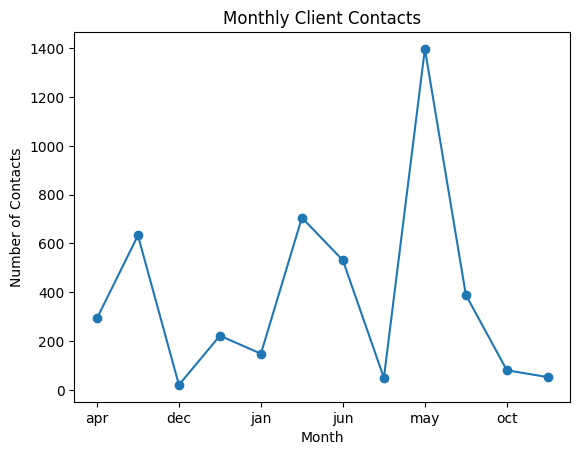

In [ ]:
# monthly trends in client contacts per month

# monthly_data = df['month'].value_counts().sort_index()
# print(df["month"].unique())

monthly_contacts = df.groupby('month', observed=True).size()
monthly_contacts.plot(kind='line', marker='o')
plt.title('Monthly Client Contacts')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()


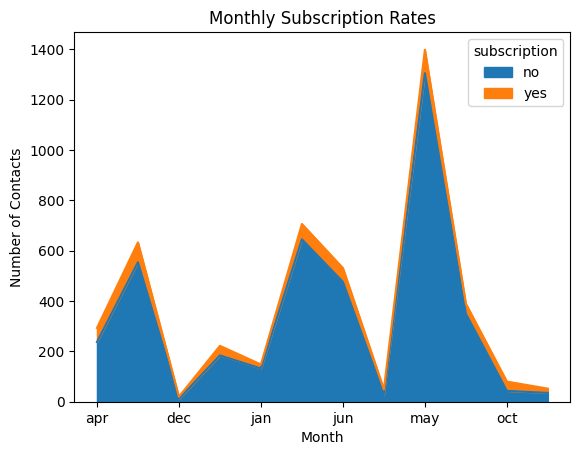

In [ ]:
# Subcription rate by month
monthly_subs = df.groupby(['month', 'subscription'], observed=True).size().unstack().fillna(0)
monthly_subs.plot(kind='area', stacked=True)
plt.title('Monthly Subscription Rates')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()


### C. Client Demographics Analysis
The analysis then focused on the subscription rates across different job categories:

- Subscription Rates by Job Category: A bar plot was created, showing that clients in certain job categories, such as 'management' and 'technician', had higher subscription rates, while others, such as 'blue-collar', had lower rates.
- Top and Bottom Performers: Job categories were ranked to identify which groups were most and least likely to subscribe.

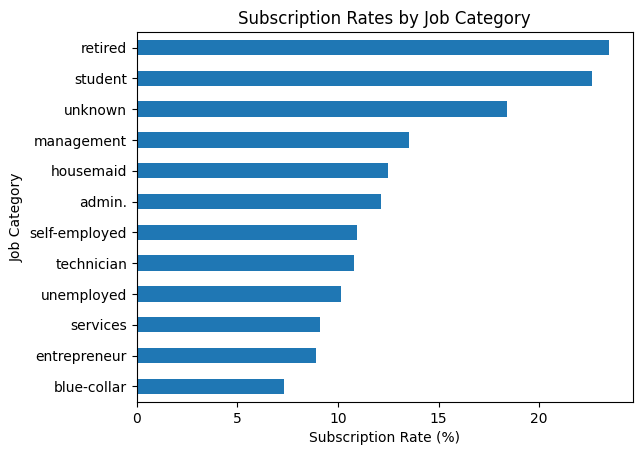

In [ ]:
job_subscription = df.groupby('job')['subscription'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
job_subscription.sort_values().plot(kind='barh')
plt.title('Subscription Rates by Job Category')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job Category')
plt.show()


### D. Contact Duration Analysis
We explored the relationship between the duration of contact and subscription success:
- Scatter Plot of Contact Duration vs. Subscription: A scatter plot was used to analyze this relationship, revealing that longer contact durations generally correlated with higher subscription success, particularly in certain job categories.

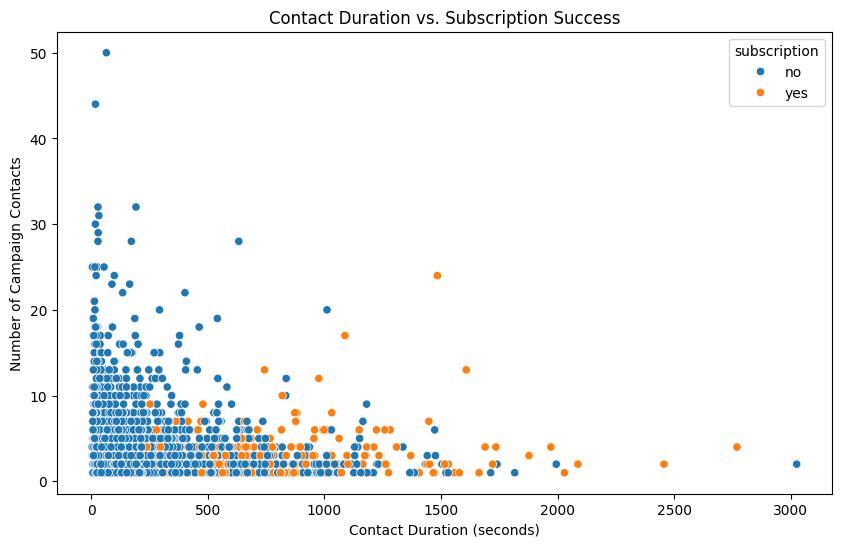

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='campaign', hue='subscription', data=df)
plt.title('Contact Duration vs. Subscription Success')
plt.xlabel('Contact Duration (seconds)')
plt.ylabel('Number of Campaign Contacts')
plt.show()


### E. Client Segment Analysis
The final part of the analysis focused on segmenting clients by age and education level:

- Subscription Rates by Age Group: Subscription rates were calculated for different age groups, revealing that clients aged 30-40 had the highest subscription rates.
- Subscription Rates by Education Level: A pie chart was created to visualize the contribution of each education level to the overall subscription rate. Clients with higher education levels showed a greater propensity to subscribe.

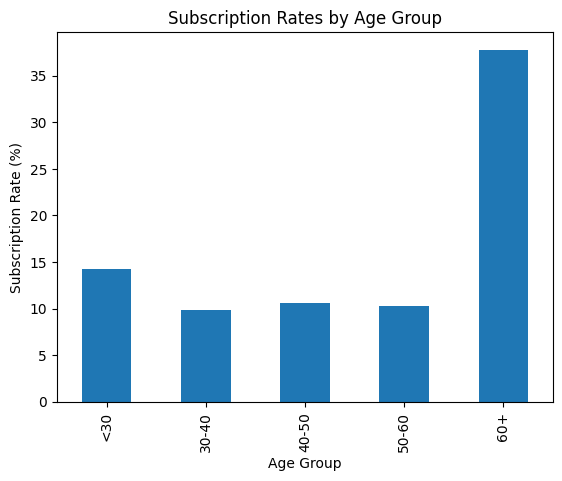

In [ ]:
age_groups = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
age_group_subscription = df.groupby(age_groups, observed=True)['subscription'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
age_group_subscription.plot(kind='bar')
plt.title('Subscription Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (%)')
plt.show()


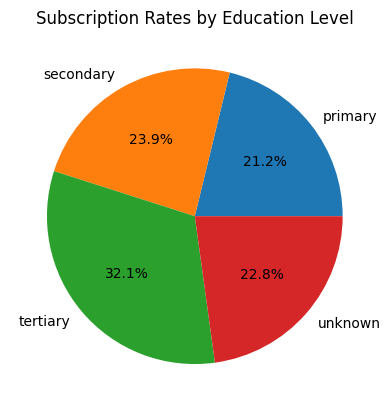

In [ ]:
education_subscription = df.groupby('education')['subscription'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
education_subscription.plot(kind='pie', autopct='%1.1f%%')
plt.title('Subscription Rates by Education Level')
plt.ylabel('')
plt.show()


# 6. Conclusion and Recommendations

### Key Findings

- Job Category Impact: Certain job categories, such as 'management', show higher subscription rates, indicating these groups may be more receptive to future marketing efforts.
- Importance of Contact Duration: There is a positive correlation between the length of client contact and the likelihood of a subscription, suggesting that investing in more extended interactions may yield better results.
- Demographic Insights: Younger clients (aged 30-40) and those with higher education levels are more likely to subscribe, offering a potential focus area for targeted campaigns.

### Recommendations
- Target High-Performing Job Categories: Future campaigns should prioritize job categories that have historically shown higher subscription rates.
- Focus on Longer Contact Durations: Training the marketing team to engage clients for longer periods could improve subscription outcomes.
- Demographic Targeting: Marketing strategies should consider age and education level as key factors in client segmentation.

# 6. Challenges and Solutions
**Challenges:**
- Data Imbalance: The dataset showed a significant imbalance between subscribed and non-subscribed clients, which could skew the analysis.
- Seasonal Variability: Monthly trends had to be carefully analyzed to account for seasonal variability in client engagement.

**Solutions**
- Use of Normalized Metrics: Subscription rates were normalized across different groups to ensure a fair comparison.
- Detailed Trend Analysis: Monthly data was carefully dissected to account for seasonal effects, ensuring that the insights derived were robust and reliable.